<a href="https://colab.research.google.com/github/OmarAlsaqa/Classical-Computer-Vision-Algorithms/blob/main/Classical_Computer_Vision_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is implemented using python from scratch with the help of NumPy and MatPlotLib liberaries.**

# Edge detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(imgRGB):
  '''
  This function reads an 3-channels image and convert the image if needed to to grayscale(1-channel).
  
  Args:
    imgRGB: np.array() image with shape (width, height, 3).
  
  Retuens: 
    convert: np.array() image with shape (width, height).
  '''
  if len(imgRGB.shape)==3 and imgRGB.shape[2]==3:
    convert = np.dot(imgRGB[...,:3], [0.2989, 0.5870, 0.1140])
  else:
    convert = imgRGB
  return convert

def readImgClipped(imgPath, Gray=False):
  '''
  This function reads an image from a path and makes sure that the readen image is between 0(black) and 1(white).

  Args:
    imgPath: str path of an image.
    Gray: bool, if true convert RGB image to Gray.
  
  Retuens: 
    ImageRGB: np.array() image with shape (width, height, num channels) not clipped.
    Image: np.array() image Cliped either gray or RGB according to Gray variable value.
  '''
  ImageRGB = plt.imread(imgPath)
  Image = ImageRGB
  if Gray:
    Image = rgb2gray(ImageRGB)
  Image = Image/np.amax(Image)
  Image = np.clip(Image, 0, 1)
  return ImageRGB, Image

def imgShow(img, Gray=False):
  '''
  This function shows Gray images with the right min, max paramters.
  
  Args:
    img: np.array() image with shape (width, height).
    Gray: bool, if true show RGB image to Gray.
  '''
  if Gray:
    if img.max() <= 1 and img.min() >= 0:
      plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    else:
      plt.imshow(img, cmap='gray')
  else:
    plt.imshow(img)

In [3]:
def imgPadReflect(img, filter, verbose=False):
  '''
  padding using reflect the edges.
  '''
  img_rows, img_columns = img.shape
  filter_rows, filter_columns = filter.shape

  pad_h = int((filter_rows - 1) / 2)
  pad_w = int((filter_columns - 1) / 2)

  padded_image = img
  #up
  padded_rows, padded_columns = padded_image.shape
  padded_image = np.concatenate((np.flip(padded_image[:pad_h,:padded_columns],axis=0), padded_image), axis=0)
  #down
  padded_rows, padded_columns = padded_image.shape
  padded_image = np.concatenate((padded_image, np.flip(padded_image[padded_rows-pad_h:,:padded_columns],axis=0)), axis=0)
  #Left
  padded_rows, padded_columns = padded_image.shape
  padded_image = np.concatenate((np.flip(padded_image[:padded_rows,:pad_w],axis=1), padded_image), axis=1)
  #Right
  padded_rows, padded_columns = padded_image.shape
  padded_image = np.concatenate((padded_image, np.flip(padded_image[:padded_rows,padded_columns-pad_w:],axis=1)), axis=1)
  
  if verbose:
    imgShow(padded_image, Gray=True)
  return padded_image

In [4]:
def convolution2D(img, filter, XandY=True):
  """
  The kernels Gx and Gy can be thought of as a differential operation in the "input_image" array in the directions x and y 
  respectively. The default kernels are Sobel, represented by the following matrices:
  Gx =               
    | -1.0   0.0  1.0 |                 
    | -2.0   0.0  2.0 |                 
    | -1.0   0.0  1.0 |                                 
  Gy =
    |  1.0   2.0   1.0 |
    |  0.0   0.0   0.0 |
    | -1.0  -2.0  -1.0 |
  
  You can pass another kernel like Prewitt, Roberts.

  Args:
    img: np.array(), image with shape (width, height).
    filter: np.array(), Kernel/filter/operator.
    XandY: bool, to calculate both X and Y gradients and return them (XandY=True)or just one of them (XandY=False)

  Retuens: 
    xfilt: np.array() image with shape (width, height) of input img.
    yfilt: np.array() image with shape (width, height) of input img if XandY=True. (Optional)
  """

  # shape of img and filter
  img_rows, img_columns = img.shape  # we need to know the shape of the input grayscale image
  filter_rows, filter_columns = filter.shape  # we need to know the shape of the filter
  filter_abs_sum = np.sum(np.abs(filter)) # For normalization only

  # Here we define the matrices associated with the Sobel filter
  Gx = filter/(filter_abs_sum/2) # np.flip(filter, axis=1)
  if XandY:
    if filter_rows >= 3:
      Gy = np.flip(filter.T, axis=0)/(filter_abs_sum/2) #filter.T # np.flip(filter.T, axis=0)
    else:
      Gy = np.flip(filter, axis=1)/(filter_abs_sum/2) # flip over Y axis. the positive direction from bottom to top.
  
  xfilt = np.zeros(shape=(img_rows, img_columns))  # initialization of the X filter image (all elements are 0)
  if XandY:
    yfilt = np.zeros(shape=(img_rows, img_columns))  # initialization of the Y filter image (all elements are 0)

  padded_image = imgPadReflect(img, filter)

  # Now we "sweep" the image in both x and y directions and compute the output
  for row in range(img_rows):
    for column in range(img_columns):
      gx = np.sum(Gx * padded_image[row:row + filter_rows, column:column + filter_columns]) # x direction
      xfilt[row, column] = gx # Normalize(gx+filter_abs_sum/2) / (filter_abs_sum+filter_abs_sum/2)
      if XandY:
        gy = np.sum(Gy * padded_image[row:row + filter_rows, column:column + filter_columns]) # y direction
        yfilt[row, column] = gy #Normalize: (gy+filter_abs_sum/2) / (filter_abs_sum+filter_abs_sum/2)
  
  if XandY:
    returned_op = xfilt, yfilt
  else:
    returned_op = xfilt
  return returned_op

In [5]:
def dnorm(x, mu, sd):
  """
  Density of the normal distribution with mean equal to mu and standard deviation equation to sd
  
  Args:
    x: np.array(), array to be normalized.
    mu: np.array(), mean.
    sd: np.array(), standard deviation.

  Retuens: 
    xfilt: np.array() image with shape (width, height) of input img.
    yfilt: np.array() image with shape (width, height) of input img if XandY=True. (Optional)
  """
  return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_filter(size, mean=0, sigma=1):
  filter_1D = np.linspace(-(size // 2), size // 2, size)
  for i in range(size):
    filter_1D[i] = dnorm(filter_1D[i], mean, sigma)
  filter_2D = np.outer(filter_1D.T, filter_1D.T)
  filter_2D = filter_2D / 2
  return filter_2D

def gaussian_blur(img, filter_size, mean, sigma):
  filter = gaussian_filter(filter_size, mean, sigma)
  blurred = convolution2D(img, filter, XandY=False)
  return blurred

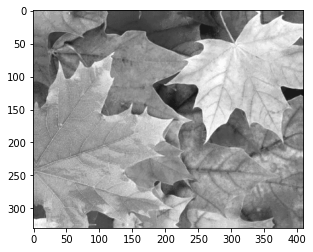

In [9]:
_,dddd = readImgClipped('/content/drive/MyDrive/Introduction to Computer Vision/Course Images/fall-leaves.png', True)
p = imgPadReflect(dddd, filter=gaussian_filter(11, mean=0, sigma=1), verbose=True)
# plt.imsave('pad.jpg',p)

In [10]:
def edge_detection(imgPath,
                   filter=np.array([[-1.0, 0.0, 1.0],[-2.0, 0.0, 2.0],[-1.0, 0.0, 1.0]]),
                   GaussianBlur_size=0, GaussianBlur_mean=0, GaussianBlur_sigma=0,
                   convert_to_degree=False, verbose=False):
  """
  The kernels Gx and Gy can be thought of as a differential operation in the "input_image" array in the directions x and y 
  respectively. The default kernels are Sobel, represented by the following matrices:
  Gx =               
    | -1.0   0.0   1.0 |                 
    | -2.0   0.0   2.0 |                 
    | -1.0   0.0   1.0 |                                 
  Gy =
    |  1.0   2.0   1.0 |
    |  0.0   0.0   0.0 |
    | -1.0  -2.0  -1.0 |
  
  You can pass another kernel like Prewitt, Roberts.

  Args:
    imgPath: np.array(), image with shape (width, height).
    filter: np.array(), Kernel/filter/operator.
    GaussianBlur_size: int, the filter size of gaussian filter to blur the image. if 0 no Gaussian Blur.
    GaussianBlur_mean: int, the mean of gaussian filter (default=0) 
    GaussianBlur_sigma: int, the Standard deviation of gaussian filter. if 0 then sigma = np.sqrt(GaussianBlur_size).\
                        NOTICE: sigma cant be 0 (divsion by zero. so, all values will be zero)
    convert_to_degree: bool, to convert the img_angle to degrees -if True- instead of radian. (default=False) 
    verbose: bool, to show the returned np.array() imgs -if true- or not (defalut=False)

  Retuens: 
    img_mag: np.array() image with shape (width, height) of input img, magnitude of X,Y gradients.
    img_angle: np.array() image with shape (width, height) of input img, direction of X,Y gradients.
  """
  # Read the image, cliped between 0 and 1 and convert it to Gray.
  input_image, grayscale_image = readImgClipped(imgPath, Gray=True)
  image = grayscale_image

  if GaussianBlur_size:
    if GaussianBlur_sigma == 0:
      GaussianBlur_sigma = np.sqrt(GaussianBlur_size)
    blurred_img = gaussian_blur(grayscale_image,
                                filter_size = GaussianBlur_size,
                                mean = GaussianBlur_mean,
                                sigma = GaussianBlur_sigma)
    image = blurred_img

  xfilt, yfilt = convolution2D(image, filter, XandY=True)

  img_mag = np.sqrt(np.square(xfilt) + np.square(yfilt))
  img_mag = img_mag * (255/img_mag.max())
  img_angle = np.arctan2(yfilt, xfilt)
  
  if convert_to_degree:
        img_angle = np.rad2deg(img_angle)
        # img_angle = img_angle + 180


  # Display the original image and the Sobel filtered image
  if verbose:
    if input_image.shape[1] > input_image.shape[0]:
      plt.figure(figsize=(15,15))
    else:
      plt.figure(figsize=(10,15))
    # Input Image
    plt.subplot(321)
    if len(input_image.shape)==3:
      imgShow(input_image)
    else:
      imgShow(input_image, Gray=True)
    plt.title('Input Image', size=14)
    # print(input_image.max(), input_image.min())
    plt.xticks([])
    plt.yticks([])
    # Blurred Image
    plt.subplot(322)
    imgShow(image, Gray=True)
    # print(image.max(), image.min())
    if GaussianBlur_size:
      plt.title('Gray Blurred Image', size=14)
    else:
      plt.title('Gray Image', size=14)
    plt.xticks([])
    plt.yticks([])
    # X Filter
    plt.subplot(323)
    imgShow(xfilt, Gray=True)
    # print(xfilt.max(), xfilt.min())
    plt.title('X Filter', size=14)
    plt.xticks([])
    plt.yticks([])
    # Y Filter
    plt.subplot(324)
    imgShow(yfilt, Gray=True)
    plt.title('Y Filter', size=14)
    plt.xticks([])
    plt.yticks([])
    # Final Filter mag
    plt.subplot(325)
    imgShow(img_mag, Gray=True)
    # print(img_mag.max(), img_mag.min())
    plt.title('Final Filter magnitude', size=14)
    plt.xticks([])
    plt.yticks([])
    # Final Filter angle
    plt.subplot(326)
    imgShow(img_angle, Gray=True)
    plt.title('Final Filter angle', size=14)
    plt.xticks([])
    plt.yticks([])
    plt.show()
  
  return image, img_mag, img_angle

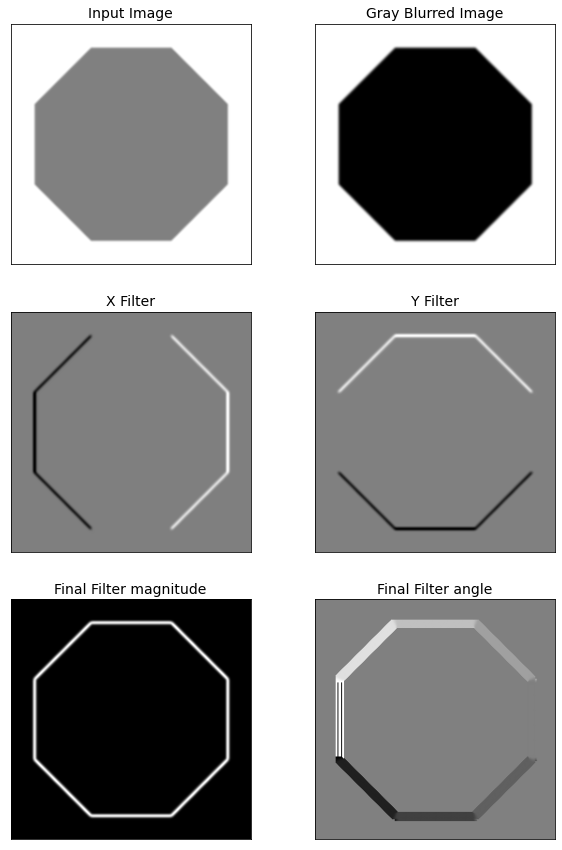

In [12]:
img, sobel_mag, sobel_angle = edge_detection('/content/drive/MyDrive/Introduction to Computer Vision/Course Images/octagon.png',
                                                          GaussianBlur_size=3, convert_to_degree=True,verbose=1)

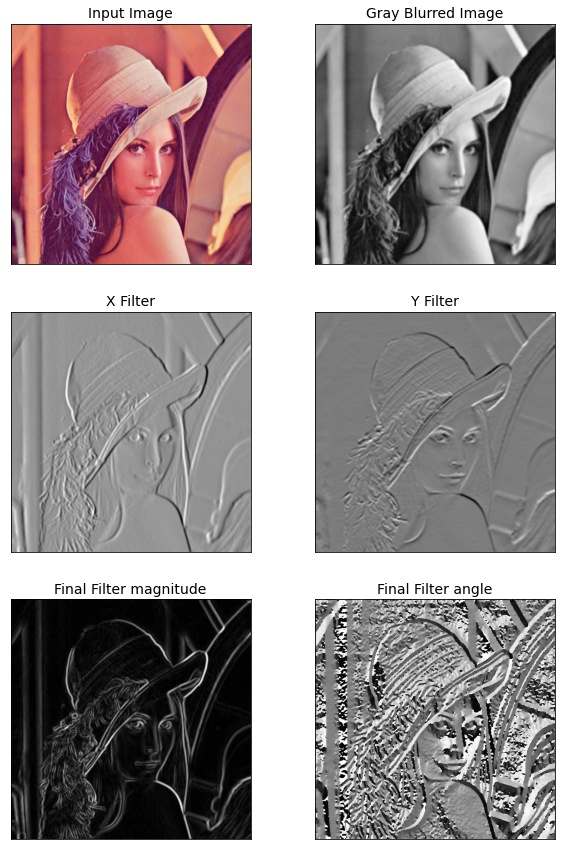

In [13]:
# Using Prewitt. a 3*3 operator.
img, mag, angle = edge_detection(imgPath='/content/drive/MyDrive/Introduction to Computer Vision/Course Images/lena.png',
                                    filter = np.array([[-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0]]), #Prewitt
                                    GaussianBlur_size=5, verbose=1)

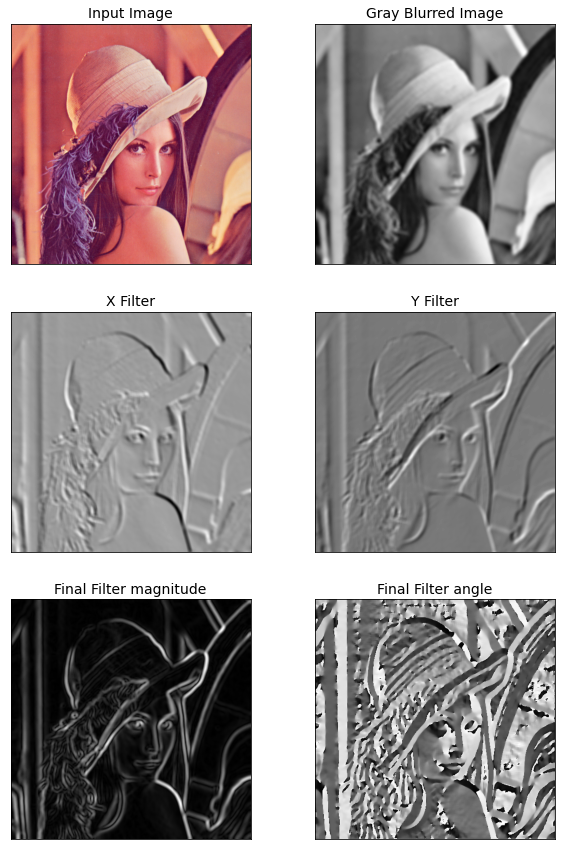

In [14]:
# Using Roberts. a 2*2 operator.
img, mag, angle = edge_detection(imgPath='/content/drive/MyDrive/Introduction to Computer Vision/Course Images/lena.png',
                                    filter = np.array([[0.0, 1.0], [-1.0, 0.0]]), #Roberts
                                    GaussianBlur_size=11, verbose=1)

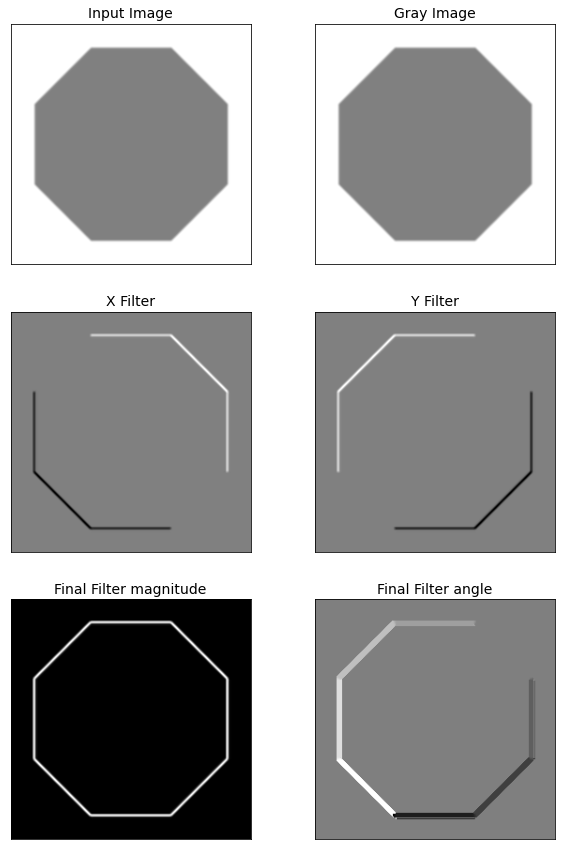

In [15]:
# Using Roberts. a 2*2 operator.
img, mag, angle = edge_detection(imgPath='/content/drive/MyDrive/Introduction to Computer Vision/Course Images/octagon.png',
                                    filter = np.array([[0.0, 1.0], [-1.0, 0.0]]), #Roberts
                                    GaussianBlur_size=0, verbose=1)

In [16]:
# Canny
def non_max_suppression(gradient_magnitude, gradient_direction, verbose=False):
  image_row, image_col = gradient_magnitude.shape
  output = np.zeros(gradient_magnitude.shape)

  PI = 180
  for row in range(1, image_row - 1):
    for col in range(1, image_col - 1):
      direction = gradient_direction[row, col]

      if (-PI/8<direction<PI/8)\
      or (7*PI/8<direction<=PI) or (-7*PI/8>direction>=-PI):
        before_pixel = gradient_magnitude[row, col - 1]
        after_pixel = gradient_magnitude[row, col + 1]
      elif (PI/8<=direction<=3*PI/8) or (-7*PI/8<=direction<=-5*PI/8):
        before_pixel = gradient_magnitude[row + 1, col - 1]
        after_pixel = gradient_magnitude[row - 1, col + 1]
      elif (3*PI/8<direction<5*PI/8) or (-5*PI/8<direction<-3*PI/8):
        before_pixel = gradient_magnitude[row - 1, col]
        after_pixel = gradient_magnitude[row + 1, col]
      else:
        before_pixel = gradient_magnitude[row - 1, col - 1]
        after_pixel = gradient_magnitude[row + 1, col + 1]

      if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
        output[row, col] = gradient_magnitude[row, col]

  if verbose:
    plt.figure(figsize=(6,6))
    plt.imshow(output, cmap='gray')
    plt.title("Non Max Suppression")
    plt.xticks([])
    plt.yticks([])
    plt.show()

  return output

def threshold(image, low=5, high=20, weak=50, strong=255, verbose=False):
  output = np.zeros(image.shape)
  # strong = 255

  strong_row, strong_col = np.where(image >= high)
  weak_row, weak_col = np.where((image <= high) & (image >= low))

  output[strong_row, strong_col] = strong
  output[weak_row, weak_col] = weak

  if verbose:
    plt.figure(figsize=(6,6))
    plt.imshow(output, cmap='gray')
    plt.title("threshold")
    plt.xticks([])
    plt.yticks([])
    plt.show()

  return output

def hysteresis(image, weak=50, strong=255, verbose=False):
  image_row, image_col = image.shape

  top_to_bottom = image.copy()

  for row in range(1, image_row):
    for col in range(1, image_col):
      if top_to_bottom[row, col] == weak:
        if top_to_bottom[row, col + 1] == 255\
        or top_to_bottom[row, col - 1] == 255\
        or top_to_bottom[row - 1, col] == 255\
        or top_to_bottom[row + 1, col] == 255\
        or top_to_bottom[row - 1, col - 1] == 255\
        or top_to_bottom[row + 1, col - 1] == 255\
        or top_to_bottom[row - 1, col + 1] == 255\
        or top_to_bottom[row + 1, col + 1] == 255:
          top_to_bottom[row, col] = 255
        else:
          top_to_bottom[row, col] = 0

  bottom_to_top = image.copy()

  for row in range(image_row - 1, 0, -1):
    for col in range(image_col - 1, 0, -1):
      if bottom_to_top[row, col] == weak:
        if bottom_to_top[row, col + 1] == 255\
        or bottom_to_top[row, col - 1] == 255\
        or bottom_to_top[row - 1, col] == 255\
        or bottom_to_top[row + 1, col] == 255\
        or bottom_to_top[row - 1, col - 1] == 255\
        or bottom_to_top[row + 1, col - 1] == 255\
        or bottom_to_top[row - 1, col + 1] == 255\
        or bottom_to_top[row + 1, col + 1] == 255:
          bottom_to_top[row, col] = 255
      else:
        bottom_to_top[row, col] = 0

  right_to_left = image.copy()

  for row in range(1, image_row):
    for col in range(image_col - 1, 0, -1):
      if right_to_left[row, col] == weak:
        if right_to_left[row, col + 1] == 255\
        or right_to_left[row, col - 1] == 255\
        or right_to_left[row - 1, col] == 255\
        or right_to_left[row + 1, col] == 255\
        or right_to_left[row - 1, col - 1] == 255\
        or right_to_left[row + 1, col - 1] == 255\
        or right_to_left[row - 1, col + 1] == 255\
        or right_to_left[row + 1, col + 1] == 255:
          right_to_left[row, col] = 255
        else:
          right_to_left[row, col] = 0

  left_to_right = image.copy()

  for row in range(image_row - 1, 0, -1):
    for col in range(1, image_col):
      if left_to_right[row, col] == weak:
        if left_to_right[row, col + 1] == 255\
        or left_to_right[row, col - 1] == 255\
        or left_to_right[row - 1, col] == 255\
        or left_to_right[row + 1, col] == 255\
        or left_to_right[row - 1, col - 1] == 255\
        or left_to_right[row + 1, col - 1] == 255\
        or left_to_right[row - 1, col + 1] == 255\
        or left_to_right[row + 1, col + 1] == 255:
          left_to_right[row, col] = 255
        else:
          left_to_right[row, col] = 0

  final_image = top_to_bottom + bottom_to_top + right_to_left + left_to_right

  final_image[final_image > 255] = 255
  
  if verbose:
    plt.figure(figsize=(6,6))
    plt.imshow(final_image, cmap='gray')
    plt.title("Canny Edge Detector")
    plt.xticks([])
    plt.yticks([])
    plt.show()

  return final_image

def canny_edges(magnitude, angle, low=5, high=40, weak=50, strong=255, verbose=False):
  '''
  canny algrothim function
  '''
  NMS = non_max_suppression(magnitude, angle, verbose=verbose)
  th = threshold(NMS, low=low, high=high, strong=strong, verbose=verbose)
  hy = hysteresis(th, weak=weak, strong=strong, verbose=verbose)

  return hy

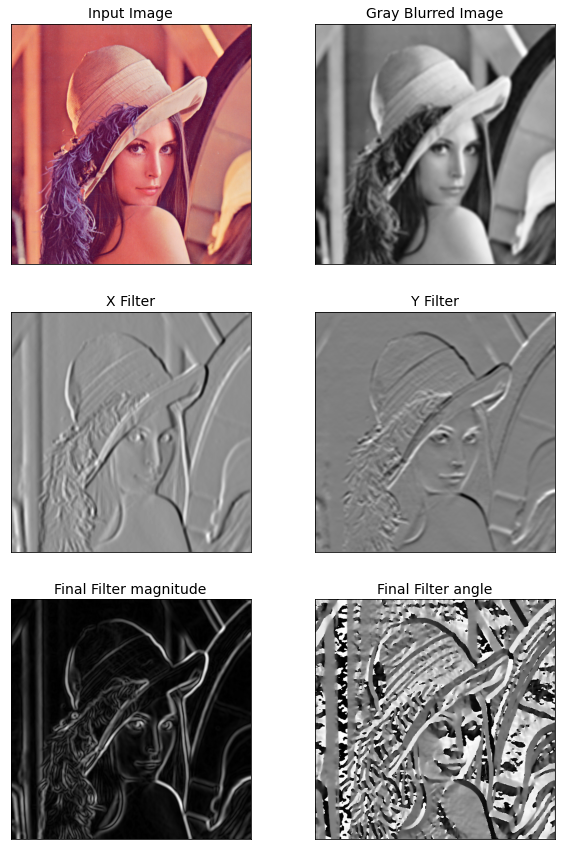

In [17]:
img, sobel_mag, sobel_angle = edge_detection('/content/drive/MyDrive/Introduction to Computer Vision/Course Images/lena.png',
                                        GaussianBlur_size=9, convert_to_degree=True,verbose=1)

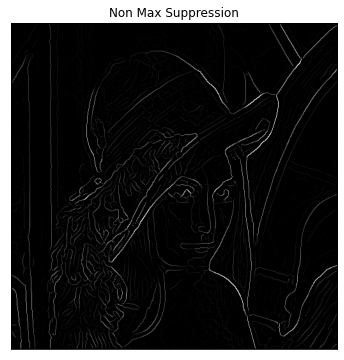

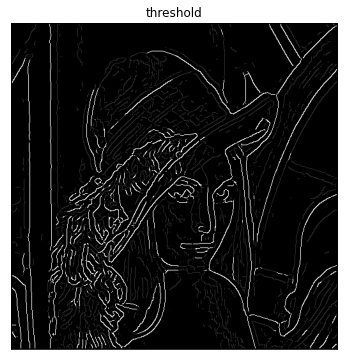

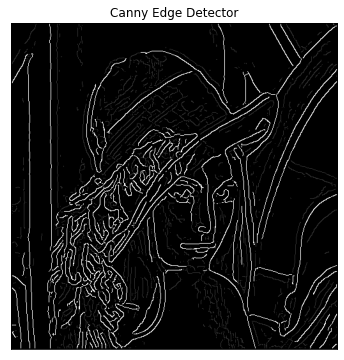

In [18]:
canny = canny_edges(sobel_mag, sobel_angle, low=10, high=45, verbose=True)

# Hough Transform

In [20]:
from skimage import data, util

# import numpy as np

# img = util.img_as_ubyte(data.coins()) > 110
# label_img = label(img, connectivity=img.ndim)
# props = regionprops(label_img)
# props[0].centroid, props[1]['centroid']

In [21]:
def _prominent_peaks(image, min_xdistance=1, min_ydistance=1, threshold=None, num_peaks=np.inf):
  from skimage import measure 
  img = image.copy()
  rows, cols = img.shape

  if threshold is None:
    threshold = 0.5 * np.max(img)

  ycoords_size = 2 * min_ydistance + 1
  xcoords_size = 2 * min_xdistance + 1

  img_max = maximum_filter1d(img, size=ycoords_size, axis=0)
  img_max = maximum_filter1d(img_max, size=xcoords_size, axis=1)

  mask = (img == img_max)
  img *= mask
  img_t = img > threshold

  label_img = measure.label(img_t)
  props = measure.regionprops(label_img, img_max)

  # Sort the list of peaks by intensity, not left-right, so larger peaks
  # in Hough space cannot be arbitrarily suppressed by smaller neighbors
  props = sorted(props, key=lambda x: x.max_intensity)[::-1]
  coords = np.array([np.round(p.centroid) for p in props], dtype=int)

  img_peaks = []
  ycoords_peaks = []
  xcoords_peaks = []

  # relative coordinate grid for local neighbourhood suppression
  ycoords_ext, xcoords_ext = np.mgrid[-min_ydistance:min_ydistance + 1, -min_xdistance:min_xdistance + 1]

  for ycoords_idx, xcoords_idx in coords:
    accum = img_max[ycoords_idx, xcoords_idx]
    if accum > threshold:
      # absolute coordinate grid for local neighbourhood suppression
      ycoords_nh = ycoords_idx + ycoords_ext
      xcoords_nh = xcoords_idx + xcoords_ext

      # no reflection for distance neighbourhood
      ycoords_in = np.logical_and(ycoords_nh > 0, ycoords_nh < rows)
      ycoords_nh = ycoords_nh[ycoords_in]
      xcoords_nh = xcoords_nh[ycoords_in]

      # reflect xcoords and assume xcoords are continuous,
      # e.g. for angles:
      # (..., 88, 89, -90, -89, ..., 89, -90, -89, ...)
      xcoords_low = xcoords_nh < 0
      ycoords_nh[xcoords_low] = rows - ycoords_nh[xcoords_low]
      xcoords_nh[xcoords_low] += cols
      xcoords_high = xcoords_nh >= cols
      ycoords_nh[xcoords_high] = rows - ycoords_nh[xcoords_high]
      xcoords_nh[xcoords_high] -= cols

      # suppress neighbourhood
      img_max[ycoords_nh, xcoords_nh] = 0

      # add current feature to peaks
      img_peaks.append(accum)
      ycoords_peaks.append(ycoords_idx)
      xcoords_peaks.append(xcoords_idx)

  img_peaks = np.array(img_peaks)
  ycoords_peaks = np.array(ycoords_peaks)
  xcoords_peaks = np.array(xcoords_peaks)

  if num_peaks < len(img_peaks):
    idx_maxsort = np.argsort(img_peaks)[::-1][:num_peaks]
    img_peaks = img_peaks[idx_maxsort]
    ycoords_peaks = ycoords_peaks[idx_maxsort]
    xcoords_peaks = xcoords_peaks[idx_maxsort]

  return img_peaks, xcoords_peaks, ycoords_peaks

def hough_line_PEAKS(hspace, angles, dists, min_distance=9, min_angle=10, threshold=None, num_peaks=np.inf):
  min_angle = min(min_angle, hspace.shape[1])
  h, a, d = _prominent_peaks(hspace, min_xdistance=min_angle, min_ydistance=min_distance, threshold=threshold, num_peaks=num_peaks)
  if a.any():
      return (h, angles[a], dists[d])
  else:
      return (h, np.array([]), np.array([]))

In [22]:
def hough_line(img, angle_step=1, rho_res=1, theta=[-np.pi/2, np.pi/2], value_threshold=5):
  """
  Hough transform for lines
  
  Input:
  img - 2D binary image with nonzeros representing edges
  angle_step - Spacing between angles to use every n-th angle between -90 and 90 degrees. Default step is 1.
  rho_res - .
  value_threshold - Pixel values above or below the value_threshold are edges
  
  Returns:
  accumulator - 2D array of the hough transform accumulator
  theta - array of angles used in computation, in radians.
  rhos - array of rho values. Max size is 2 times the diagonal distance of the input image.
  """
  
  width, height = img.shape

  # Rho and Theta ranges
  # Norm of img shapes, to get the half of length of accumulator height (y-axis).
  offset = np.int(np.ceil(np.sqrt((width) * (width) + (height) * (height))))
  max_rho = 2 * offset + 1
  # array of all rhos from -offset to offset with step = rho_res default = 1.
  rhos = np.linspace(-offset, offset, max_rho) #bins
  # array of all angles in rad from -90 to 89 with step = angle_step default angle_step=1
  thetas = np.linspace(theta[0], theta[1], 180, endpoint=False)

  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = thetas.shape[0]

  # Hough accumulator array of theta vs rho
  accumulator = np.zeros((max_rho, num_thetas), dtype=np.uint64)

  # (row, col) indexes to edges
  y_idxs, x_idxs = np.nonzero(img) # use only edge points, e.g. (yids[0],xids[0]) locates the first non-zero value in img. y-> row, x->col

  # Vote in the hough accumulator, 
  for i in range(x_idxs.shape[0]):
    # NOTICE: yids=xids.
    x = x_idxs[i]
    y = y_idxs[i]
    for theta_idx in range(num_thetas):
      accum_idx = np.round((cos_t[theta_idx] * x + sin_t[theta_idx] * y)) + offset
      accumulator[accum_idx, theta_idx] += 1

  return accumulator, thetas, rhos

def show_hough_line(img, accumulator, thetas, rhos):

  plt.figure(figsize=(10,10))
  plt.imshow(
      accumulator, cmap='jet',
      extent=[np.rad2deg(thetas[-1])*10, np.rad2deg(thetas[0])*10, rhos[-1], rhos[0]])
  plt.title('Hough transform')
  plt.xlabel('Angles (degrees) * 10')
  plt.ylabel('Distance (pixels)')
  plt.axis('image')
  plt.show()

def maximum_filter1d(input, size, axis=1):
  """Calculate a 1-D maximum filter along the given axis.
  The lines of the array along the given axis are filtered with a
  maximum filter of given size.
  axis = 0 -> V filter
  axis = 1 -> H filter

  Examples
  --------
  >>> maximum_filter1d([[2, 8, 0, 4, 1, 9, 9, 0],[3, 7, 9, 1, 7, 8, 3, 0]], size=3, axis=1)
  array([[8, 8, 8, 4, 9, 9, 9, 9],
         [7, 9, 9, 9, 8, 8, 8, 3]])
  >>> maximum_filter1d([[2, 8, 0, 4, 1, 9, 9, 0],[3, 7, 9, 1, 7, 8, 3, 0]], size=3, axis=0)
  array([[3, 8, 9, 4, 7, 9, 9, 0],
         [3, 8, 9, 4, 7, 9, 9, 0]])    
  """

  if axis == 0:
    input = input.T
  input = np.asarray(input)
  output = np.array([])
  
  for j in input:
    small_input = np.insert(j,[0]*(size//2),[0 for ind in range(0, size//2)])
    small_output= np.zeros(small_input.shape)
    for i in range(size//2, small_input.shape[0]):
      small_output[i] = np.max(small_input[i-(size//2):i+((size//2)+1)])
    output = np.append(output, small_output[size//2:])
  output = output.reshape(input.shape).astype(np.uint64)
  if axis == 0:
    output = output.T
  return output

import cv2

def clip(idx):
  return int(max(idx,0))

def hough_peaks(accumulator, numpeaks=1, threshold=100, nhood_size=5):
  peaks = np.zeros((numpeaks,2), dtype=np.uint64)
  temp_accm = accumulator.copy()
  for i in range(numpeaks):
    _,max_val,_,max_loc = cv2.minMaxLoc(temp_accm) # find maximum peak
    if max_val > threshold:
      peaks[i] = max_loc
      c, r = max_loc
      t = nhood_size//2.0
      temp_accm[clip(r-t):int(r+t+1), clip(c-t):int(c+t+1)] = 0
    else:
      peaks = peaks[:i]
      break
  return peaks[:,::-1]

def hough_lines_draw(img, peaks, rhos, thetas):
  out_img = img.copy()
  for peak in peaks:
    rho = rhos[peak[0]]
    theta = thetas[peak[1]] * np.pi / 180.0
    a = np.cos(theta); b = np.sin(theta)
    pt0 = rho * np.array([a,b])
    pt1 = tuple((pt0 + 1000 * np.array([-b,a])).astype(int))
    pt2 = tuple((pt0 - 1000 * np.array([-b,a])).astype(int))
    cv2.line(out_img, pt1, pt2, (0,0,255), 2)
  imgShow(out_img, True)
  return out_img

# def filter_lines(peaks, thetas, rhos, theta_threshold, rho_threshold):
#   del_list = []
#   for i in range(len(peaks)):
#     delta_rho = np.abs(np.array([abs(rhos[peaks[j,0]] - rhos[peaks[i,0]]) for j in range(len(peaks))]))
#     delta_theta = np.array([abs(thetas[peaks[j,1]] - thetas[peaks[i,1]]) for j in range(len(peaks))])
#     if not ((delta_theta < theta_threshold) & (delta_rho > 1) & (delta_rho < rho_threshold)).any():
#       del_list += [i]

#   peaks = np.delete(peaks, del_list, 0)
#   return peaks

In [23]:
img, sobel_mag, sobel_angle = edge_detection('/content/drive/MyDrive/Introduction to Computer Vision/Course Images/shapes.png',
                                        GaussianBlur_size=5, convert_to_degree=True,verbose=False)

In [24]:
canny = canny_edges(sobel_mag, sobel_angle, low=20, high=30, verbose=False)

In [25]:
from skimage.transform import hough_line, hough_line_peaks

hspace, angles, dists = hough_line(canny)

In [26]:
hspace, angles, dists = hough_line_peaks(hspace, angles, dists)
hspace, angles, dists

(array([207, 142, 121, 112, 110, 108, 105, 104], dtype=uint64),
 array([ 0.83366286, -1.21978039,  0.27203735, -0.95651843, -0.93896764,
         1.20222959,  1.00917082, -1.1320264 ]),
 array([367.81873374,  26.52298352, 139.62098873,  -2.50216826,
        -30.52645273, 269.73373807, 286.74848222, -39.53425846]))

In [27]:
accumulator, thetas, rhos = hough_line(canny)

In [28]:
accumulator.shape

(1154, 180)

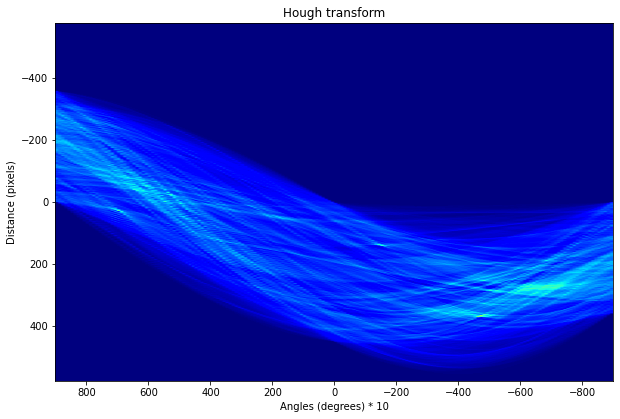

In [29]:
show_hough_line(canny, accumulator, thetas, rhos)

In [48]:
peaks, p_theta, p_rho = hough_line_PEAKS(accumulator, thetas, rhos, min_distance=9, min_angle=10, threshold=None, num_peaks=np.inf)

In [49]:
peaks, p_theta, p_rho

(array([207, 142, 121, 112, 110, 108, 105, 104], dtype=uint64),
 array([ 0.83366286, -1.21978039,  0.27203735, -0.95651843, -0.93896764,
         1.20222959,  1.00917082, -1.1320264 ]),
 array([367.81873374,  26.52298352, 139.62098873,  -2.50216826,
        -30.52645273, 269.73373807, 286.74848222, -39.53425846]))

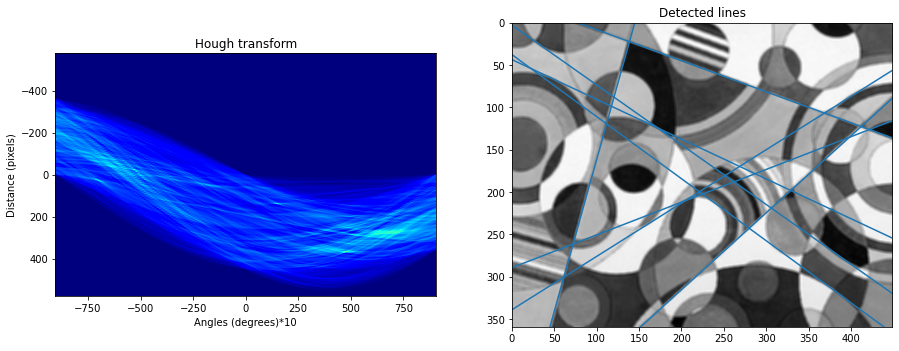

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

angle_step = 0.5 * np.diff(thetas).mean()
d_step = 0.5 * np.diff(rhos).mean()
bounds = [np.rad2deg(thetas[0] - angle_step)*10,
          np.rad2deg(thetas[-1] + angle_step)*10,
          rhos[-1] + d_step, rhos[0] - d_step]

ile = ax[0].imshow(accumulator,cmap='jet', extent=bounds, aspect=1 / 1.5)
ax[0].set_title('Hough transform')
ax[0].set_xlabel('Angles (degrees)*10')
ax[0].set_ylabel('Distance (pixels)')
ax[0].axis('image')

ax[1].imshow(img, cmap=cm.gray)
ax[1].set_xlim((0, img.shape[1]-1))
ax[1].set_ylim((img.shape[0]-1, 0))
# ax[1].set_axis_off()
ax[1].set_title('Detected lines')

for _, angle, dist in zip(peaks, p_theta, p_rho):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[1].axline((x0, y0), slope=np.tan(angle + np.pi/2))